In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Euler Method for Finite Difference Approximation

Finite Difference Approximations (or FDA for short) are methods for numerical differentiations. In other words, FDAs are techniques to solve differential equations by approximating derivitives with difference equations. There are lots of ways to do that and here we are using the simplest one, i.e. Euler method

In this method we use the first two terms of Taylors series expantion to approximate the derivative with difference equation


$f(x+\delta x) = f(x) + f'(x)\Delta x +  1/2f''(x)\Delta x^2 + 1/6 f'''(x) \Delta x^3 + 1/24 f''''(x) \Delta x^4 + ...$

$\dfrac{f(x+\delta x)-f(x)}{\Delta x} = f'(x) + 1/2f''(x)\Delta x + O(\Delta x^2)$

So if you want to approximate $f'(x)$ with the difference equation $\dfrac{f(x+\delta x)-f(x)}{\Delta x}$, then you would have some additional terms (errors) which is $1/2f''(x)\Delta x + O(\Delta x^2)$



### Example (1): $f(x) = ax^2 +b$
Suppose that we want to calculate the derivitive of f(x). we can approximate that by the Euler difference equation.
You can clearly see this if you want to approximate the $f(x) = ax^2 + b$ function with the Euler difference equation:

$f'(x) = 2ax$

$\dfrac{f(x+\delta x)-f(x)}{\Delta x} = 2ax + a\Delta x$

Note that since $f''(x) = 0$, we don't have the $O(\Delta x^2)$ errors


### Example (2): $f(x) = x sin(2x) + x^2$

Suppose that we want to calculate the $f'(x)$. We can approximate that by the Euler finit difference eqution. However we know that we will have error in order of $\Delta x$. In the example above, you could see that analyticlally but lets see that in numerical results.

The exact value of $f'(x)$ is $f'(x) = sin(2x) + 2xcos(2x) + 2x$

but lets approximate that using the finite difference equation.

In [47]:
def f(x):
    return x*np.sin(x*2) + x**2

def f_derivitive(x):
    return np.sin(2*x) + 2*x*np.cos(2*x) + 2*x

x_range = np.arange(0,10,0.01)
y = f(x)

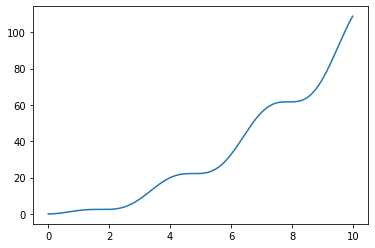

In [35]:
plt.plot(x,y)

In [39]:
def F_difference(l):
    dx = 10/np.power(2,l)
    x = 0
    df = np.zeros(np.power(2,l))
    xList = np.zeros(np.power(2,l))
    for i in range(np.power(2,l)):
        xList[i] = x
        df[i] = (f(x+dx)-f(x))/dx
        x += dx
        
    return xList,df
        
    

In [74]:
x4,df4 = F_difference(4)
x5,df5 = F_difference(5)
x6,df6 = F_difference(6)
x7,df7 = F_difference(7)
x8,df8 = F_difference(8)

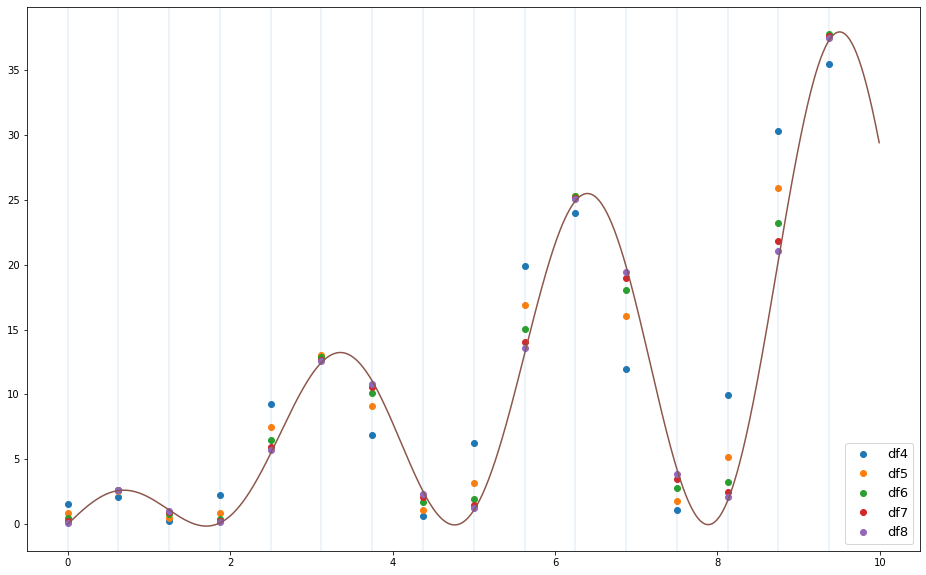

In [77]:
plt.figure(figsize=(16,10))
plt.plot(x4,df4,'o', label='df4')
plt.plot(x5[::2],df5[::2],'o', label='df5')
plt.plot(x6[::4],df6[::4],'o', label='df6')
plt.plot(x7[::8],df7[::8],'o', label='df7')
plt.plot(x8[::16],df8[::16],'o', label='df8')



plt.plot(x_range, f_derivitive(x_range))
for elem in x4:
    plt.axvline(elem, alpha=0.1)
    
plt.legend(fontsize=13)

As you can see, as we decrease $\Delta x$, the finite difference approximation becomes closer to the real value of the derivitive. note that $dfn$ is the finite difference approximation of $f'(x)$ with $\Delta x = \dfrac{t_{max}}{2^l}$

In [83]:
x4

array([0.   , 0.625, 1.25 , 1.875, 2.5  , 3.125, 3.75 , 4.375, 5.   ,
       5.625, 6.25 , 6.875, 7.5  , 8.125, 8.75 , 9.375])

Now lets calculate the difference between the real value of $f'(x)$ and $dfn$ (the finite difference approximation using n level discreteization)
lets evaluate at x = 8.75

In [104]:
n = [4,5,6,7,8]
xn = [x4,x5,x6,x7,x8]
dfn = [df4,df5,df6,df7,df8]

valueAtX = []
for i in range(5):
    value = dfn[i][xn[i]==8.75]
    valueAtX.append(value[0])

In [114]:
a,b = np.polyfit(np.log2(n), np.log2(valueAtX),1)

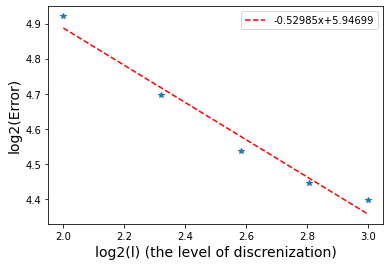

In [149]:
plt.plot(np.log2(n), np.log2(valueAtX),'*')
plt.plot([np.log2(n[i]) for i in [0,-1]],[a*np.log2(n[i])+b for i in [0,-1]],'r--', label=f'{a:2.5f}x+{b:2.5f}')
plt.xlabel("log2(l) (the level of discrenization)", fontsize=14)
plt.ylabel("log2(Error)", fontsize=14)
plt.legend()

### Conclusion:

Through out this code, I decreased the value of $\Delta x$ according to $l$ (i.e. level of discretization).

$\Delta x_l = \dfrac{t_{min} - t_{max}}{2^l}$

since the Euler finite difference equation has error $O(\Delta x)$, then we expect the error decrease with $(2)^{-l} = (0.5)^l$. In the plot above, I have calculated the error vs. l (level of discretization). as you can see it is decreasing with $0.5^l$

# How to use Euler F.D.A to slove differential equations

in the differential equation, we can approximate the derivitive with finite difference equation and then solve it iterativly. However the accuracy of solving differential equations using integration methods (like Rung-Kuta) has more accuracy and lower error. 

It does not mean that the F.D.A methods are useless. They are the aleternatives for numerical derviation. 

Also, F.D.A methos can be used to check the correctness of the answer of differential equation solved with integration methods (apply F.D.A to the anwer of the integration method, and you should be able to construct the original function. Note that the derivitive and integration are opposite of each other)

## Example) Solving : $\dot x = f(x)$

To solve the differential equation we, let's approximate the derivitive with Euler finite difference equation:

$\dot x \approx \dfrac{(x_{n+1} - x_n)}{\Delta x}$

$\dot = -f(x) + O(\Delta x)$

$\rightarrow  \dfrac{(x_{n+1} - x_n)}{\Delta x} \approx f(x_n)$

So the final formula will be:

### $x_{n+1} = f(x)\Delta x + x_n$

### Example) Solving the decay ODE $\dot x = -x$

The finite difference solution of this particular problem will be:

$x_{n+1} = -x\Delta x + x_n$

In [150]:
def dx(x):
    return -x

In [161]:
l = 8
tmax = 10
N = np.power(2,l)
dt = tmax/N
t = 0
x = 10

x_list = np.zeros(N)
t_list = np.zeros(N)

In [162]:
for i in range(N):
    x_list[i] = x
    t_list[i] = t
    x+= -x*dx
    t+=dt
    
    

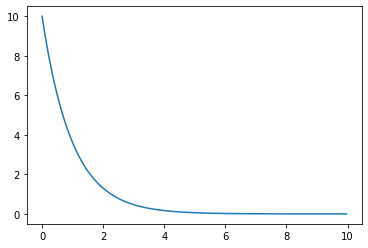

In [163]:
plt.plot(t_list, x_list)